In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
df = pd.read_csv('./動畫瘋訓練資料集2版.csv', index_col='id')

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 582 entries, 1 to 582
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   動畫名     582 non-null    object 
 1   總觀看數    582 non-null    int64  
 2   平均觀看數   582 non-null    int64  
 3   年份      582 non-null    int64  
 4   月份      582 non-null    int64  
 5   集數      582 non-null    int64  
 6   星級      582 non-null    float64
 7   評分人數    582 non-null    int64  
 8   導演監督    564 non-null    object 
 9   台灣代理    582 non-null    object 
 10  製作廠商    564 non-null    object 
 11  作品分類1   582 non-null    object 
 12  作品分類2   574 non-null    object 
 13  作品分類3   415 non-null    object 
 14  作品分類4   203 non-null    object 
 15  作品分類5   75 non-null     object 
 16  作品分類6   6 non-null      object 
 17  原作載體    493 non-null    object 
 18  新續作     499 non-null    object 
dtypes: float64(1), int64(6), object(12)
memory usage: 90.9+ KB


In [66]:
df.tail(40)

,動畫名,總觀看數,平均觀看數,年份,月份,集數,星級,評分人數,導演監督,台灣代理,製作廠商,作品分類1,作品分類2,作品分類3,作品分類4,作品分類5,作品分類6,原作載體,新續作
id,,,,,,,,,,,,,,,,,,,
543,世界一初戀～求婚編～,64000,64000,2020,2,1,4.7,507,高橋知也,羚邦,STUDIO DEEN,戀愛,BL,NaN,NaN,NaN,NaN,NaN,NaN
544,星光王子 舞台劇 Over the Sunshine！,4785,4785,2020,2,1,2.9,56,杉田智彦,提恩傳媒,NaN,校園,青春,偶像,音樂,真人演出,NaN,原創作品,續作
545,星光王子 舞台劇 Shiny Rose Stars,2469,1234,2020,2,2,3.2,33,NaN,提恩傳媒,NaN,校園,青春,偶像,音樂,真人演出,NaN,原創作品,續作
546,鳴鳥不飛：烏雲密布,8738,8738,2020,2,1,4.8,255,牧⽥佳織,采昌,GRIZZLY,戀愛,BL,NaN,NaN,NaN,NaN,NaN,NaN
547,ACCA13 區監察課 Regards,64000,64000,2020,2,1,4.9,605,夏目真悟,曼迪,MADHOUSE,溫馨,親情,推理,懸疑,NaN,NaN,NaN,NaN
548,築夢奇蹟,7938,7938,2020,2,1,3.7,38,Kim Hagen Jensen,木棉花,First Lady Film,冒險,親情,闔家觀賞,NaN,NaN,NaN,NaN,NaN
549,哥布林殺手 -GOBLIN’S CROWN-,339000,339000,2020,2,1,4.6,2152,尾崎隆晴,木棉花,WHITE FOX,冒險,奇幻,血腥暴力,黑暗,NaN,NaN,小說改編,續作
550,烘焙小精靈,-1,-1,2020,1,1,4.1,20,烏特馮蒙肖波爾,木棉花,Akkord Film Production,溫馨,闔家觀賞,NaN,NaN,NaN,NaN,NaN,NaN
551,BanG Dream！第三季,756000,58154,2020,1,13,4.9,2173,柿本広大,木棉花,三次元,青春,勵志,音樂,NaN,NaN,NaN,原創作品,續作


In [70]:
df.loc[df['總觀看數'] == -1]

,動畫名,總觀看數,平均觀看數,年份,月份,集數,星級,評分人數,導演監督,台灣代理,製作廠商,作品分類1,作品分類2,作品分類3,作品分類4,作品分類5,作品分類6,原作載體,新續作
id,,,,,,,,,,,,,,,,,,,


In [68]:
df.drop(index=550, inplace=True)

In [69]:
df.loc[df['總觀看數'] == -1]

,動畫名,總觀看數,平均觀看數,年份,月份,集數,星級,評分人數,導演監督,台灣代理,製作廠商,作品分類1,作品分類2,作品分類3,作品分類4,作品分類5,作品分類6,原作載體,新續作
id,,,,,,,,,,,,,,,,,,,


In [73]:
print(df['總觀看數'].describe(),'\n')
print(df['平均觀看數'].describe())

count    5.810000e+02
mean     1.173972e+06
std      2.195996e+06
min      1.087000e+03
25%      9.100000e+04
50%      4.070000e+05
75%      1.403000e+06
max      2.238100e+07
Name: 總觀看數, dtype: float64 

count       581.000000
mean      91689.382100
std      125651.930058
min         175.000000
25%       13385.000000
50%       45583.000000
75%      126962.000000
max      932542.000000
Name: 平均觀看數, dtype: float64


In [72]:
df.sort_values('總觀看數', ascending=False)

,動畫名,總觀看數,平均觀看數,年份,月份,集數,星級,評分人數,導演監督,台灣代理,製作廠商,作品分類1,作品分類2,作品分類3,作品分類4,作品分類5,作品分類6,原作載體,新續作
id,,,,,,,,,,,,,,,,,,,
458,咒術迴戰,22381000,932542,2020,10,24,4.9,20200,朴性厚,羚邦,MAPPA,動作,奇幻,超能力,校園,血腥暴力,靈異神怪,漫畫改編,新作
185,SPY×FAMILY 間諜家家酒,17603000,704120,2022,4,25,4.9,52703,古橋一浩,木棉花,WIT STUDIO×CloverWorks,動作,喜劇,親情,NaN,NaN,NaN,漫畫改編,續作
421,進擊的巨人 The Final Season,17210000,593448,2020,12,29,4.9,24841,林祐一郎,木棉花,MAPPA,動作,冒險,戰爭,血腥暴力,NaN,NaN,原創作品,新作
409,關於我轉生變成史萊姆這檔事 第二季,16078000,618385,2021,1,26,4.8,14097,中山敦史,木棉花,8bit,冒險,奇幻,異世界,魔法,喜劇,NaN,小說改編,續作
391,無職轉生，到了異世界就拿出真本事,12968000,540333,2021,1,24,4.9,25806,岡本学,木棉花,StudioBind,動作,冒險,奇幻,異世界,魔法,NaN,小說改編,續作
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,衝鋒戰士：恐龍世代,2606,2606,2021,4,1,3.1,20,金振哲,華藝娛樂,NaN,冒險,闔家觀賞,NaN,NaN,NaN,NaN,NaN,NaN
545,星光王子 舞台劇 Shiny Rose Stars,2469,1234,2020,2,2,3.2,33,NaN,提恩傳媒,NaN,校園,青春,偶像,音樂,真人演出,NaN,原創作品,續作
91,我們的黎明,1680,1680,2022,10,1,4.3,40,黑川智之,采昌,ZERO-G,冒險,科幻,溫馨,感人,闔家觀賞,NaN,NaN,NaN


In [74]:
condition = df.isnull().any(axis='columns')
df[condition]

,動畫名,總觀看數,平均觀看數,年份,月份,集數,星級,評分人數,導演監督,台灣代理,製作廠商,作品分類1,作品分類2,作品分類3,作品分類4,作品分類5,作品分類6,原作載體,新續作
id,,,,,,,,,,,,,,,,,,,
1,獻祭公主與獸王,407000,16958,2023,4,24,4.9,2068,今千秋,ANIPLUS,J.C.STAFF,奇幻,戀愛,NaN,NaN,NaN,NaN,漫畫改編,新作
2,國王排名 勇氣的寶箱,303000,30300,2023,4,10,4.5,1995,八田洋介,羚邦,WIT STUDIO,冒險,奇幻,勵志,溫馨,NaN,NaN,漫畫改編,續作
3,魔術士歐菲 流浪之旅 聖域篇,37000,3083,2023,4,12,3.2,216,濱名孝行,羚邦,Studio DEEN,冒險,奇幻,NaN,NaN,NaN,NaN,小說改編,續作
4,【我推的孩子】,7065000,642273,2023,4,11,4.9,52618,平牧大輔,羚邦,動畫工房 (DOGAKOBO),親情,偶像,懸疑,NaN,NaN,NaN,漫畫改編,新作
5,屍體如山的死亡遊戲,2678000,133900,2023,4,20,4.8,10096,小野學,羚邦,GEEK TOYS,動作,冒險,異世界,血腥暴力,NaN,NaN,漫畫改編,續作
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,魔法紀錄 魔法少女小圓外傳,872000,67077,2020,1,13,4.7,1494,劇団イヌカレー（泥犬）、宮本幸裕,木棉花,SHAFT,冒險,奇幻,魔法,黑暗,NaN,NaN,原創作品,新作
579,名偵探柯南：大怪獸哥梅拉 VS 假面超人,108000,108000,2020,1,1,4.6,409,NaN,曼迪,V1Studio,推理,懸疑,NaN,NaN,NaN,NaN,漫畫改編,新作
580,達爾文遊戲,3708000,285231,2020,1,13,4.8,5745,德本善信,木棉花,Nexus,動作,超能力,競技,懸疑,血腥暴力,NaN,漫畫改編,新作


<Axes: xlabel='月份', ylabel='總觀看數'>

d:\GitHub\Anime_View_Number_Regression\.venv\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 26376 (\N{CJK UNIFIED IDEOGRAPH-6708}) missing from current font.
  func(*args, **kwargs)
d:\GitHub\Anime_View_Number_Regression\.venv\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 20221 (\N{CJK UNIFIED IDEOGRAPH-4EFD}) missing from current font.
  func(*args, **kwargs)
d:\GitHub\Anime_View_Number_Regression\.venv\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 32317 (\N{CJK UNIFIED IDEOGRAPH-7E3D}) missing from current font.
  func(*args, **kwargs)
d:\GitHub\Anime_View_Number_Regression\.venv\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 35264 (\N{CJK UNIFIED IDEOGRAPH-89C0}) missing from current font.
  func(*args, **kwargs)
d:\GitHub\Anime_View_Number_Regression\.venv\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 30475 (\N{CJK UNIFIED IDEOGRAPH-770B}) missing from current font.
  func(*args, **kwargs)
d:\Gi

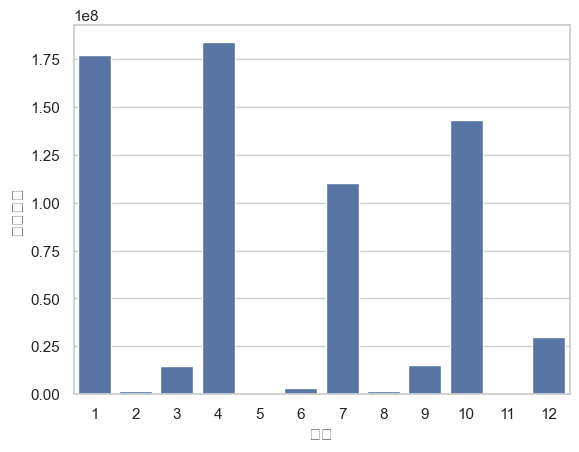

In [76]:
sns.set_theme(style='whitegrid')
view_number_total = df.groupby('月份', as_index=False).sum()
sns.barplot(data=view_number_total, x='月份', y='總觀看數')